# The Probability Mass Function (PMF) - Lab

## Introduction
The class size paradox describes the apparent contradictory findings where a total allocation of resources is fixed. Differences result in the perception of events based on whether we consider events from the point of view of the typical event or the typical person participating in an event. Such varying distributions can have important consequences for data analysis. pmfs can help resolve some of these situations as we shall see below 

## Objectives

You will be able to:

* Understand and explain the class size paradox 
* Use pmfs to visualize actual and biased observations
* Calculate mean from pmfs to identify the expected value


## The Problem 
![](https://www.insidehighered.com/sites/default/server_files/styles/large/public/media/iStock_000021583873XSmall.jpg?itok=u_y_yItN)

At an educational establishment, the expected student-to-teacher ratio is 10:1. But randomly interviewed students often feel that their average class size is much bigger than 10. There are two main reasons for such observations:

1. Students typically engage into 4 – 5 classes at any given time, but teachers only teach 1 or 2 classes.
2. An obvious fact, that number of students in a small class is small, and the number of students in a large class is large.

Due to the second fact, while randomly taking feedback from students, we would surely come across more students from larger classes.

Let's work through a set of data to re-create and analyze this paradox. 

Suppose that a college offers 65 classes in a term. We can start with a following distribution of sizes and counts:

```
 size      count
 5- 9          8
10-14          8
15-19         14
20-24          4
25-29          6
30-34         12
35-39          8
40-44          3
45-49          2
```

If the campus manager is inquired about the average average class size, he would perform the following tasks:

1. Construct a pmf from given data
2. Compute the mean from calculated pmf

So let's follow the management approach first and see what mean we get from our pmf. Here is a `size_and_count` dictionary to get you started. Calculate the pmf from this data as we have seen before. For keys, we have used the average for each class size i.e. for size 5 - 9, we use 7 as an average.

In [5]:
size_and_count = { 7: 8, 12: 8, 17: 14, 22: 4, 
          27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
size_and_count.keys()
size_and_count.values()

dict_values([8, 8, 14, 4, 6, 12, 8, 3, 2])

Following the approach seen in the previous lesson, calculate the pmf by normalizing each size. 

In [39]:
import numpy as np
sizes = np.array(list(size_and_count.keys()))
classes = np.array(list(size_and_count.values()))
classes.sum()

pmf = []
for key,val in size_and_count.items():   
   pmf.append(round((val/classes.sum()), 3))
sizes, pmf

# ([7, 12, 17, 22, 27, 32, 37, 42, 47],
#  [0.123, 0.123, 0.215, 0.062, 0.092, 0.185, 0.123, 0.046, 0.031])

(array([ 7, 12, 17, 22, 27, 32, 37, 42, 47]),
 [0.123, 0.123, 0.215, 0.062, 0.092, 0.185, 0.123, 0.046, 0.031])

As an additional check, these probability values must sum to 1. Let's check for that

In [33]:
# Uncomment the line below, the output should be 1
np.array(pmf).sum()

1.0

## Calculate Mean / Expected Value (E)

We can now calculate the average of **Expected** value for this distribution.

>The mean **μ** ( or expected value E,**E [X]** ) of a random variable X is the sum of the weighted possible values for X; weighted, that is, by their respective probabilities. If S is the set of all possible values for X, then the formula for the mean is:

### μ = ∑ x ∈ S  x ⋅ p (x)

In simple terms, we must multiply each element in the sizes list to their probability of occurrence. Let's do this in a for loop below:

In [59]:
# Calculate the expected value (mu) using formula above
pmf = np.array(pmf)
pmf
pmf * sizes
mu = (pmf * sizes).sum()
mu 
# 23.7

23.700000000000003

So the campus manager's answer would be 23.7 , as the average class size. And this makes a lot of sense too looking at our calculation above. We can plot a pmf function based on above findings for inspections. 

In [ ]:
# Plot the pmf , it should look similar to the one shown below

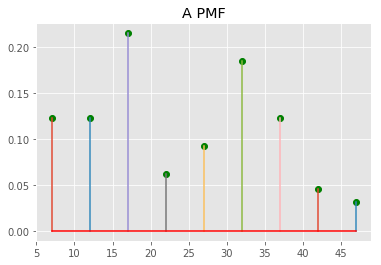

In [44]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.stem(sizes, pmf, '-', 'go', 'r-')
plt.title("A PMF")
plt.show()

## Random Student Survey

Now if we survey a random group of students about size of their classes, and compute the mean, according to the paradox, we would observe that the average class is much bigger than 23.7. Howcome !!! Let's see this in action below:

First, let's compute a distribution as a likely observation by students, where the probability associated with each class size is “biased” by the number of students in the class. Perform following tasks to introduce this biasness. 

* For each class size x, multiply the class probability by x, the number of students who observe that class size. 
* Get the sum for biased class size sum
The result is a new Pmf that represents the biased distribution.

In [56]:
biased = pmf * sizes # * classes
biased

biased_sum = biased.sum()

sizes, pmf, biased, biased_sum

# ([0.861, 1.476, 3.655, 1.3639999999999999, 2.484, 5.92, 4.551, 1.932, 1.457],
#  23.700000000000003)

(array([ 7, 12, 17, 22, 27, 32, 37, 42, 47]),
 array([0.123, 0.123, 0.215, 0.062, 0.092, 0.185, 0.123, 0.046, 0.031]),
 array([0.861, 1.476, 3.655, 1.364, 2.484, 5.92 , 4.551, 1.932, 1.457]),
 23.700000000000003)

This is great so far, we can now normalize the new biased list with the sum of its values, just like we did before. 
* Normalize the biased list and calculate the new pmf

In [61]:
#sizes are keys classes are values

pmf2 = []

for bias in biased:   
   pmf2.append(round((bias/biased.sum()), 3))

pmf2 = np.array(pmf2)
sizes, pmf, pmf2

# ([7, 12, 17, 22, 27, 32, 37, 42, 47],
#  [0.036, 0.062, 0.154, 0.058, 0.105, 0.25, 0.192, 0.082, 0.061])

(array([ 7, 12, 17, 22, 27, 32, 37, 42, 47]),
 array([0.123, 0.123, 0.215, 0.062, 0.092, 0.185, 0.123, 0.046, 0.031]),
 array([0.036, 0.062, 0.154, 0.058, 0.105, 0.25 , 0.192, 0.082, 0.061]))

Right so we can see that probabilities values in this pmf are different than our original pmf. So just like before, we can calulcate the MU, average or expected value.  

In [50]:
mu_biased = (np.array(pmf2) * sizes).sum()

mu_biased
# 29.14

29.140000000000004

the biased mean is much higher than our actual mean 

#### Here comes the paradox 

![](https://c1.staticflickr.com/8/7009/6650662771_844b9323ba.jpg)

Here we see it, the average or expected value of biased results become much higher than the average of actual values. In some situations, such a paradox could be mind boggling. As an extra measure , we can inspect both pmfs side by side in a visual manner to see the differences. 

* Plot a figure with two axes
* Show pmf1 and pmf2 side by side. 

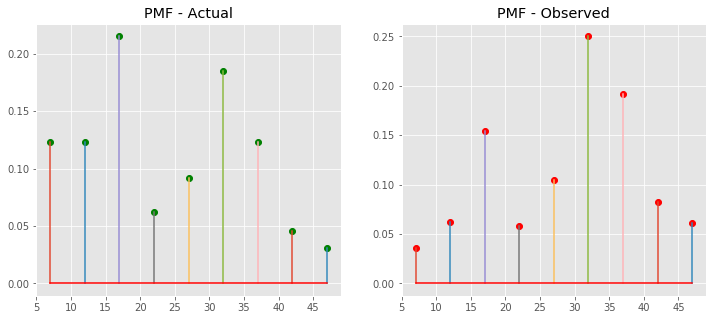

In [52]:
# Plot pmfs side by side

new_figure = plt.figure(figsize=(12,5))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.stem(sizes, pmf, '-', 'go', 'r-');
ax2.stem(sizes, pmf2, '-', 'ro', 'r-');

ax.set_title ("PMF - Actual");
ax2.set_title ("PMF - Observed");

plt.show()


So our results tell us that in the biased distribution there are fewer small classes and more large classes. 

The mean of the biased distribution is 29.1, almost 25% higher than the actual mean.

To to an even more direct comparison, plot these pmfs on top of each other and change the marker style for differentiation. 

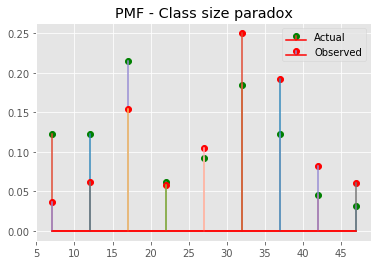

In [54]:
# Plot pmfs overlapping
plt.stem(sizes, pmf, '-', 'go', 'r-', label= 'Actual' );
plt.stem(sizes, pmf2, '-', 'ro', 'r-', label= 'Observed' );
plt.title ("PMF - Class size paradox");
plt.legend()
plt.show()

Here is the key, We can see for smaller class sizes, the probability of coming across a students is lower than actual probability. Also, in the larger classes, the the probability of coming across a student is much higher than actual probability. And hence this appears to an observer as a Paradox. But its not a paradox for us anymore .. We have nailed it. 

## Level Up (Optional)

It is also possible to reverse this operation. Imagine you want to find the distribution of class sizes at a campus, but you can’t get reliable data from the campus manager. You can choose a random sample of students and ask how many students are in their classes.

The result would be biased for the reasons that we have seen in this lesson. You need to write an **un-bias** function that divides each probability by x instead of multiplying.

Give it a go ...



## Summary 
In this lesson we looked at a common paradox termed as "Class Size Paradox" which deals with difference in observation by different people based on their circumstances. This phenomenon is not limited to class sizes, but may also work with other similar scenarios. In the bog data domain, this can become really complicated duw to large number of involved individuals and huge variations in the probabilities of their observations, based on their settings. 